In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('jobs_in_data.csv')
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


**Learning about the dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [4]:
print(f"There are {df['job_title'].nunique()} job titles")
print(f"There are {df['job_category'].nunique()} job categories")
print(f"There are {df['experience_level'].nunique()} experience levels")
print(f"There are {df['employment_type'].nunique()} types of employment")
print(f"There are {df['work_setting'].nunique()} work settings")
print(f"There are {df['company_size'].nunique()} types of companies")
print(f"There are {df['work_year'].nunique()} years of record")

There are 125 job titles
There are 10 job categories
There are 4 experience levels
There are 4 types of employment
There are 3 work settings
There are 3 types of companies
There are 4 years of record


**Top 5 Job titles in terms of employee count**

<Axes: ylabel=' '>

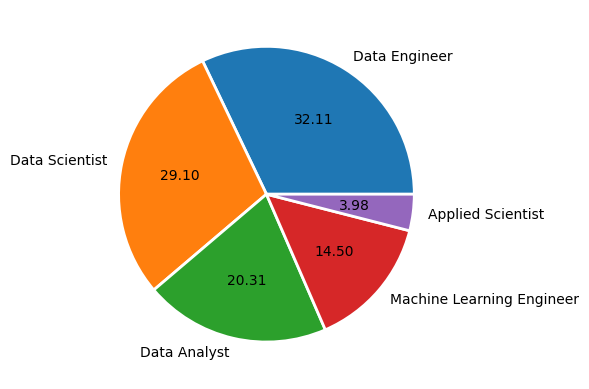

In [5]:
df['job_title'].value_counts(normalize= True).iloc[:5].plot(kind= 'pie', xlabel=" ",ylabel= " ", autopct = "%.2f", wedgeprops = {'linewidth': 2.0, 'edgecolor':'white'})

**Top 5 Job categories in terms of employee count**

<Axes: ylabel=' '>

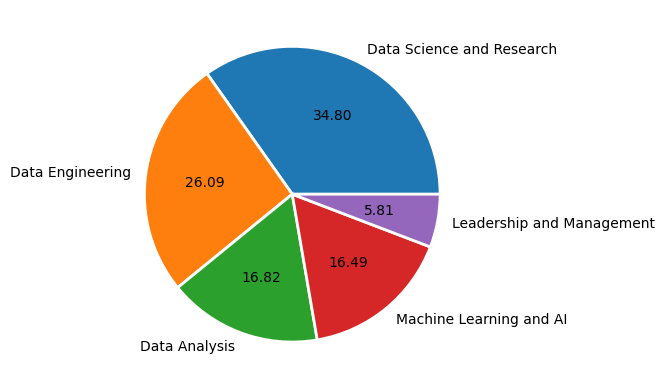

In [6]:
df['job_category'].value_counts(normalize= True).iloc[:5].plot(kind= 'pie', xlabel=" ",ylabel= " ", autopct = "%.2f", wedgeprops = {'linewidth': 2.0, 'edgecolor':'white'})

**Distribution of employees residentially**

In [7]:
df['employee_residence'].value_counts()

employee_residence
United States     8086
United Kingdom     442
Canada             224
Spain              117
Germany             66
                  ... 
Andorra              1
Qatar                1
Mauritius            1
Uganda               1
Malta                1
Name: count, Length: 83, dtype: int64

**distribution of salary**

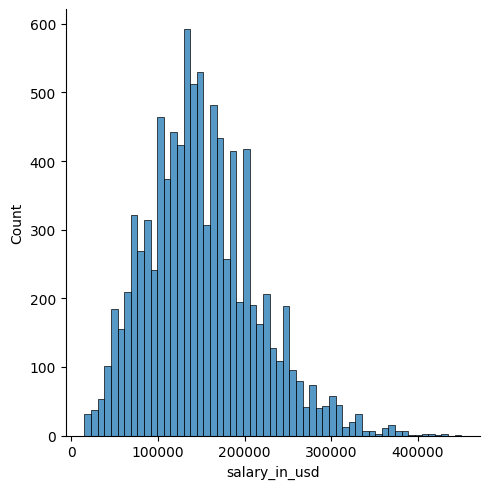

In [9]:
sns.displot(df['salary_in_usd'])

**Correlation of salary with experience**

In [10]:
df['experience_level'].unique()

array(['Mid-level', 'Senior', 'Executive', 'Entry-level'], dtype=object)

In [11]:
for index, exp in enumerate(df['experience_level']):
    match exp:
        case 'Entry-level':
            df.loc[index, 'experience_level_num'] = 1
        case 'Mid-level':
            df.loc[index,'experience_level_num'] = 2
        case 'Senior':
            df.loc[index, 'experience_level_num'] = 3
        case 'Executive':
            df.loc[index, 'experience_level_num'] = 4
        case _:
            pass

            
df['experience_level_num']

0       2.0
1       3.0
2       3.0
3       3.0
4       3.0
       ... 
9350    3.0
9351    3.0
9352    2.0
9353    1.0
9354    1.0
Name: experience_level_num, Length: 9355, dtype: float64

<Axes: xlabel='experience_level_num', ylabel='salary_in_usd'>

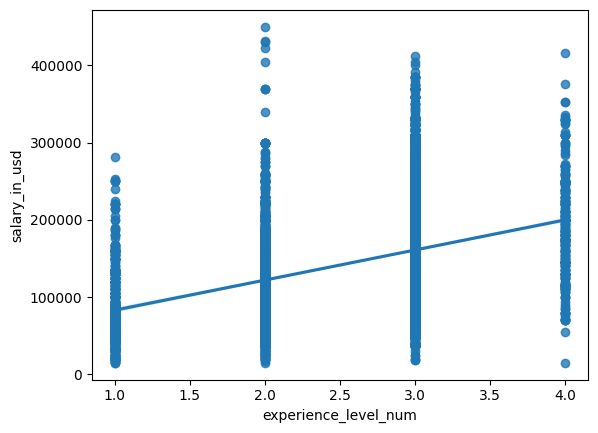

In [12]:
sns.regplot(data= df, y='salary_in_usd', x='experience_level_num')

In [13]:
correlation = np.corrcoef(y = df['salary_in_usd'],x = df['experience_level_num'])
print(f"correlation coefficient is {correlation[0,1]} and positive")

correlation coefficient is 0.3735588593004557 and positive


**Bivariate Analysis of Salary and Work Setting**

<Axes: xlabel='salary_in_usd'>

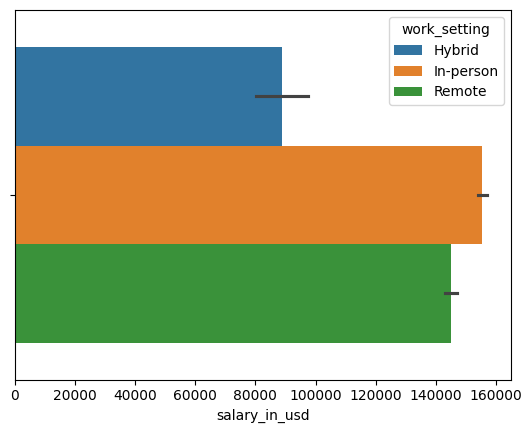

In [14]:
sns.barplot(data= df, x= 'salary_in_usd', hue= 'work_setting', orient= 'y')

**Univariate Analysis of company size**

In [29]:
df['company_size'].value_counts()

company_size
M    8448
L     748
S     159
Name: count, dtype: int64

<Axes: xlabel='company_size', ylabel='count'>

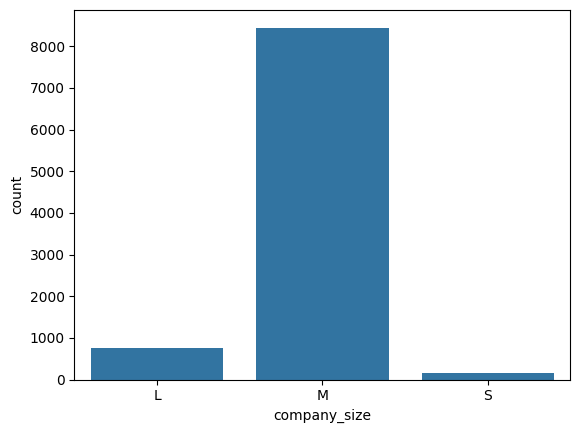

In [30]:
sns.countplot(data= df, x= 'company_size')

**Multivariate Analysis of salary with company size and job category**

<Axes: xlabel='salary_in_usd', ylabel='job_category'>

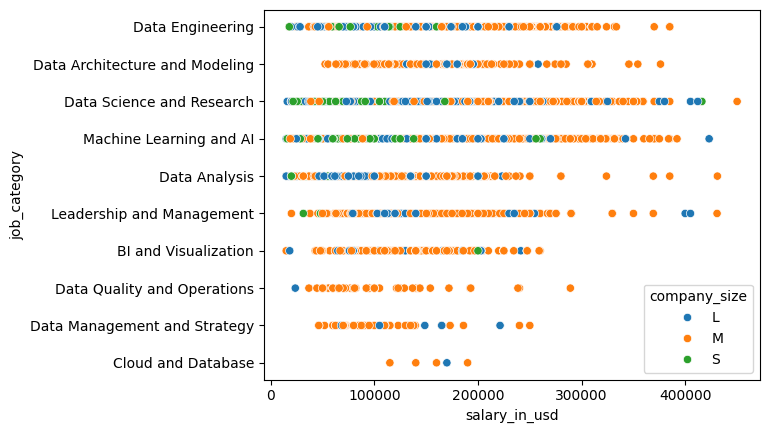

In [15]:
sns.scatterplot(data= df, y= 'job_category', x= 'salary_in_usd', hue='company_size')

**Bivariate analysis of currency and salary**

In [16]:
df['salary_currency'].value_counts()

salary_currency
USD    8591
GBP     347
EUR     340
CAD      38
AUD      11
PLN       7
SGD       6
CHF       5
BRL       4
TRY       3
DKK       3
Name: count, dtype: int64

<Axes: xlabel='salary_currency', ylabel='salary_in_usd'>

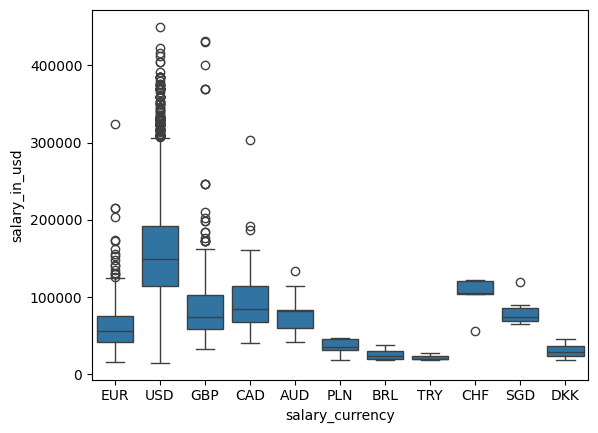

In [17]:
sns.boxplot(x = 'salary_currency', y= 'salary_in_usd', data= df)

**Work Setting**

In [18]:
df['work_setting'].unique()

array(['Hybrid', 'In-person', 'Remote'], dtype=object)

In [19]:
df['work_setting'].value_counts()

work_setting
In-person    5730
Remote       3434
Hybrid        191
Name: count, dtype: int64

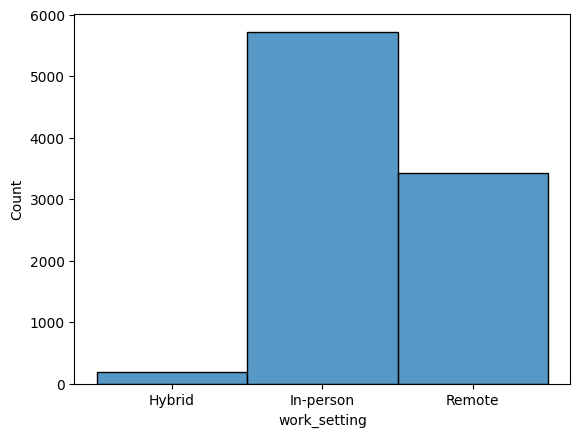

In [20]:
plt.subplot()
plt_work= sns.histplot(data= df, x= 'work_setting')

**Bivariate Analysis of experience with work setting**

In [21]:
pv_table = pd.crosstab(df['work_setting'], df['experience_level'])
pv_table

experience_level,Entry-level,Executive,Mid-level,Senior
work_setting,,,,
Hybrid,67,6,69,49
In-person,239,156,1153,4182
Remote,190,119,647,2478


<Axes: xlabel='experience_level', ylabel='work_setting'>

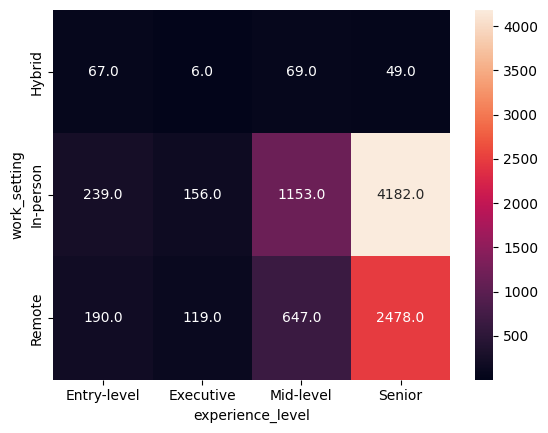

In [22]:
sns.heatmap(data= pv_table, annot= True, fmt= '.1f')

**Bivariate Analysis of employment type with work setting**

In [23]:
pv_table2 = pd.crosstab(df['work_setting'], df['employment_type'])

<Axes: xlabel='employment_type', ylabel='work_setting'>

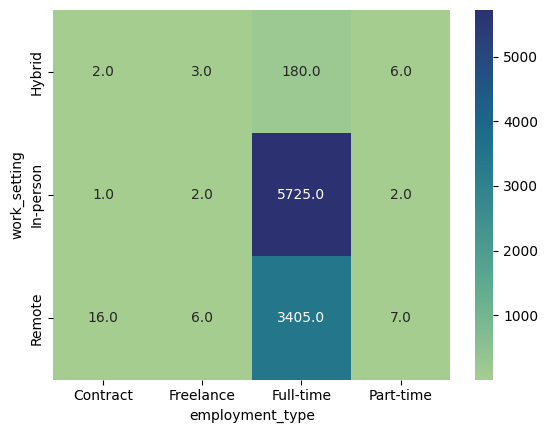

In [24]:
sns.heatmap(data= pv_table2, annot= True, fmt= '.1f', cmap= 'crest')

**What is the most popular job title in the field of data for each year**

In [25]:
df['work_year'].unique()

array([2023, 2022, 2020, 2021], dtype=int64)

In [26]:
df['work_year'].value_counts()

work_year
2023    7453
2022    1634
2021     197
2020      71
Name: count, dtype: int64

In [27]:
for i in df['work_year'].unique():
    print(df.loc[df['work_year'] == i, 'job_title'].value_counts().iloc[0:1])

job_title
Data Engineer    1662
Name: count, dtype: int64
job_title
Data Engineer    487
Name: count, dtype: int64
job_title
Data Scientist    19
Name: count, dtype: int64
job_title
Data Engineer    35
Name: count, dtype: int64
